In [ ]:
# SARIMA Grid Search
# https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=2127684&userName=akuppam

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

# Read in data
df = pd.read_csv("/users/akuppam/documents/Data/RoverData/rnbl2agg.csv")
df.head(5)

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,2016-01-01,all,all,2293712,8845,118349,8205,698,7507,6.740627e+05,191935.4706,28296771
1,2016-01-02,all,all,2620436,10255,142797,10094,838,9256,7.939500e+05,248524.9014,28205540
2,2016-01-03,all,all,3186849,12837,184483,12351,890,11461,7.694853e+05,299503.2650,28194192
3,2016-01-04,all,all,3317763,13517,188283,14251,1415,12836,1.711552e+06,339585.2933,28349902
4,2016-01-05,all,all,3267402,14318,194315,15468,1584,13884,1.814768e+06,368632.8372,28373795


In [7]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
#print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
#print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

In [8]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['nb'],
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:22078.12058011398
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:21148.598719898386
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:18741.157678337608
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:18462.73295483117
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:18756.417096149697
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:18693.305429404514
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:18506.939421762065
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:18437.960601409068
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:21333.385293837415
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:20908.430201783398
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:18169.871071660433
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:17835.04729206834
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:18190.978182112336
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:18045.59014715202
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:17914.797661312135
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:17825.687940082746
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:17733.923948150303
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:17452.505936683247
SARIMA(0, 1, 0

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
print('SARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))

SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:17299.422363435377


In [10]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [20]:
# This was the best model with the lowest AIC (detected manually)
# SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:16750.35992425388
# ---------------------------------------------------------------

### CHANGE order & seasonal_order HERE
### ------   ### ---------- ### ------

mod = sm.tsa.statespace.SARIMAX(df['nb'], 
                                order=(2,1,2), 
                                seasonal_order=(0,1,2,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                 nb   No. Observations:                  998
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -8368.180
Date:                            Tue, 16 Oct 2018   AIC                          16750.360
Time:                                    14:22:36   BIC                          16784.414
Sample:                                         0   HQIC                         16763.330
                                            - 998                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1589      0.034     33.763      0.000       1.092       1.226
ar.L2         -0.7514      0.023   

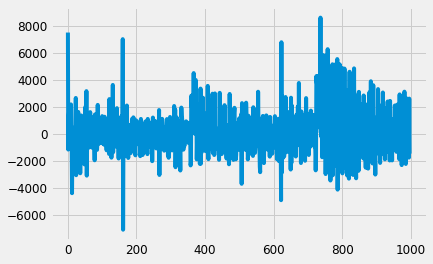

In [22]:
# check errors
results.resid.plot()

In [23]:
print(results.resid.describe())

count     998.000000
mean        3.497017
std      1519.003102
min     -7081.180335
25%      -868.867750
50%      -105.389283
75%       639.040713
max      8611.291991
dtype: float64


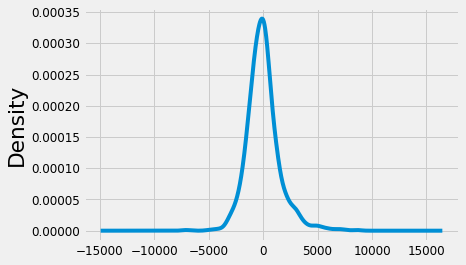

In [24]:
results.resid.plot(kind='kde')

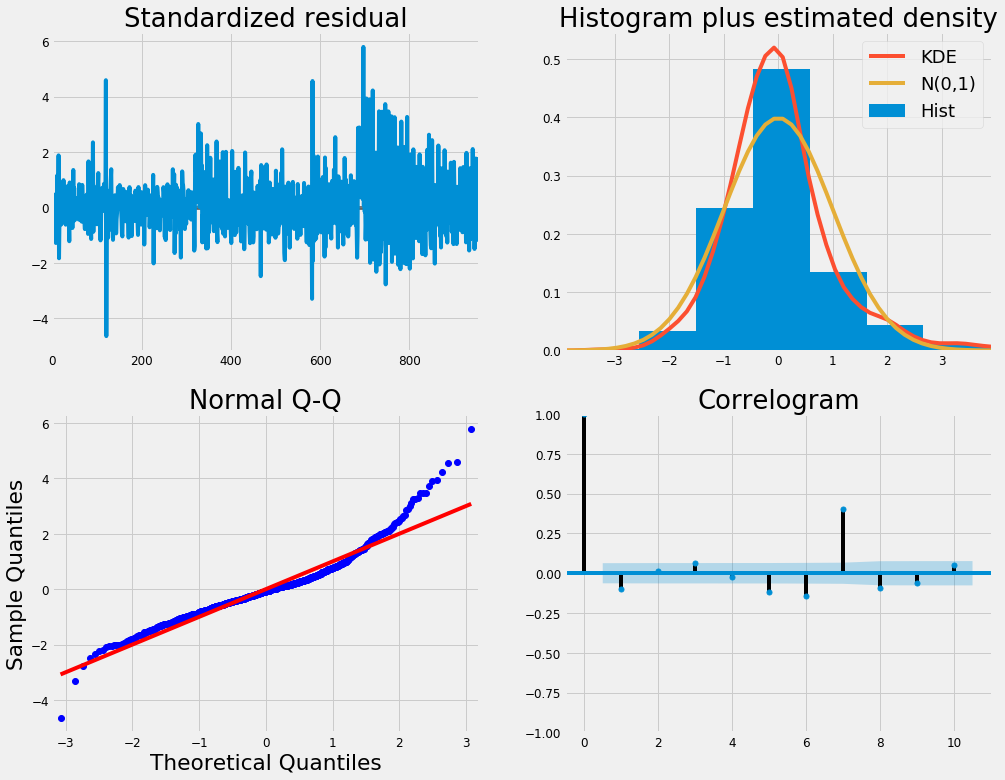

In [25]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
date         998 non-null object
region       998 non-null object
marketing    998 non-null object
visits       998 non-null int64
br           998 non-null int64
inq          998 non-null int64
gb           998 non-null int64
cb           998 non-null int64
nb           998 non-null int64
ss           998 non-null float64
ts           998 non-null float64
listings     998 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 93.6+ KB


In [32]:
pred = results.get_prediction(start = 999, end = 1118, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower nb,upper nb
999,12641.722338,19880.449091
1000,11999.585008,19643.286887
1001,10812.358114,18594.166545
1002,11317.359367,19281.207384
1003,11619.061761,20031.841767


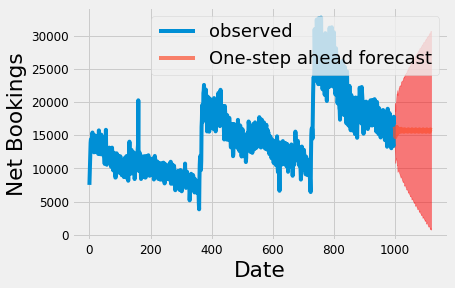

In [33]:
ax = df['nb'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Date')
ax.set_ylabel('Net Bookings')
plt.legend()

plt.show()

In [37]:
nb_forecast.describe()

count      120.000000
mean     15734.283544
std        170.318344
min      14703.262330
25%      15688.603021
50%      15762.118940
75%      15792.372398
max      16261.085714
dtype: float64

In [35]:
nb_forecast = pred.predicted_mean  # this only has the forecasted 120 time points
nb_truth = df['nb']  # this is the observed data 998 time points

# Compute the mean square error
mse = ((nb_forecast - nb_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((nb_forecast-nb_truth)**2)/len(nb_forecast))))


The Mean Squared Error (MSE) of the forecast is nan
The Root Mean Square Error (RMSE) of the forecast: nan


In [ ]:
nb_pred_concat = pd.concat([nb_truth, nb_forecast])

In [39]:
pred_dynamic = results.get_prediction(start = 999, end = 1118, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

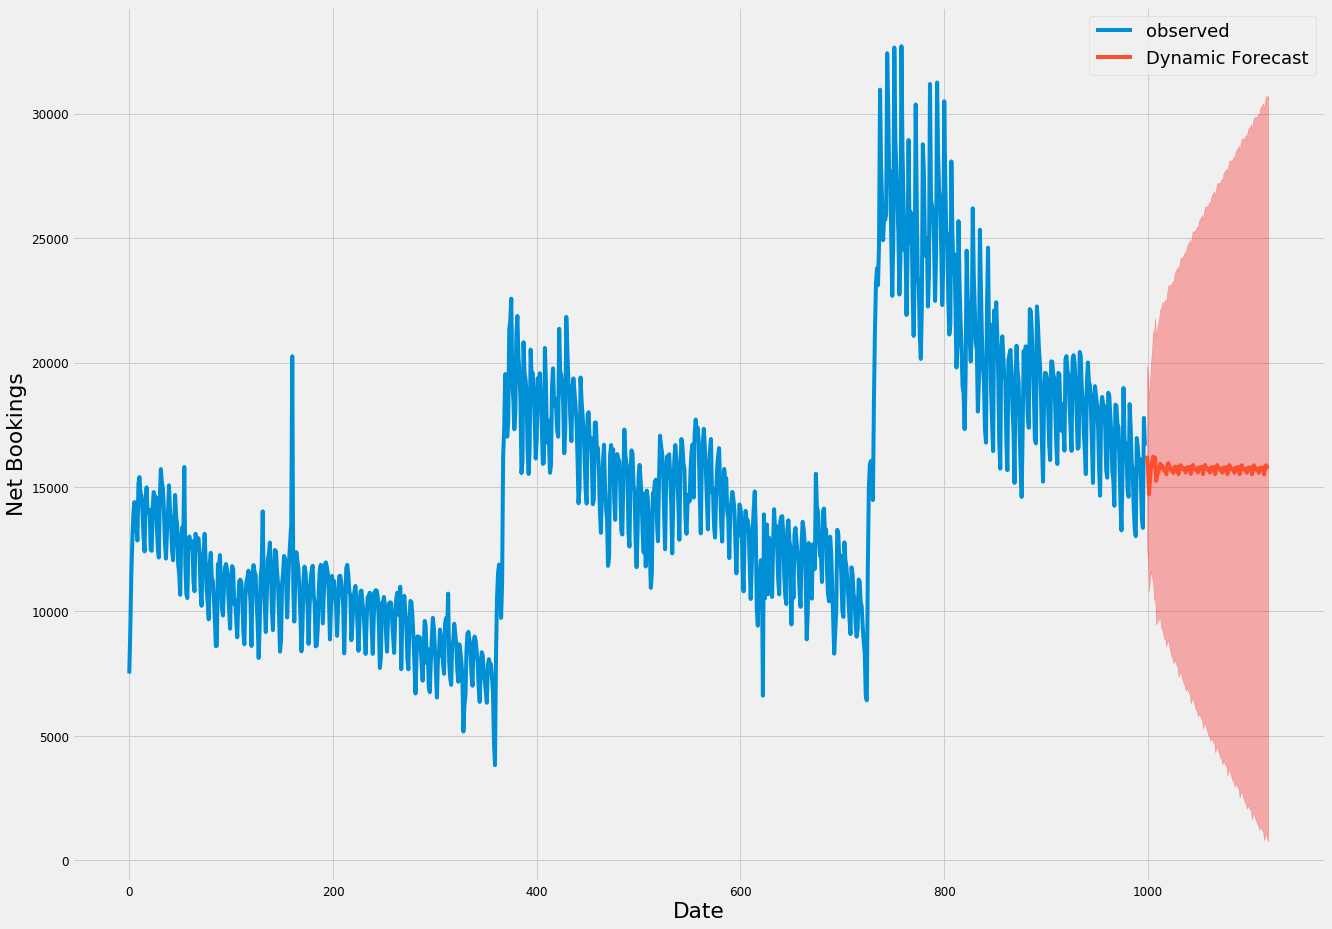

In [42]:
nb_forecast = pred.predicted_mean  # this only has the forecasted 120 time points
nb_truth = df['nb']  # this is the observed data 998 time points

# Compute the mean square error
mse = ((nb_forecast - nb_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((nb_forecast-nb_truth)**2)/len(nb_forecast))))

nb_pred_concat = pd.concat([nb_truth, nb_forecast])

pred_dynamic = results.get_prediction(start = 999, end = 1118, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = df['nb'].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

#ax.fill_betweenx(ax.get_ylim(), 
#                 pd.to_datetime('2016-01-01'), 
#                 df.index[-1],
#                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Net Bookings')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

In [43]:
# Forecasting

# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps = 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()


,lower nb,upper nb
998,13872.319314,19694.982109
999,12641.722338,19880.449091
1000,11999.585008,19643.286887
1001,10812.358114,18594.166545
1002,11317.359367,19281.207384


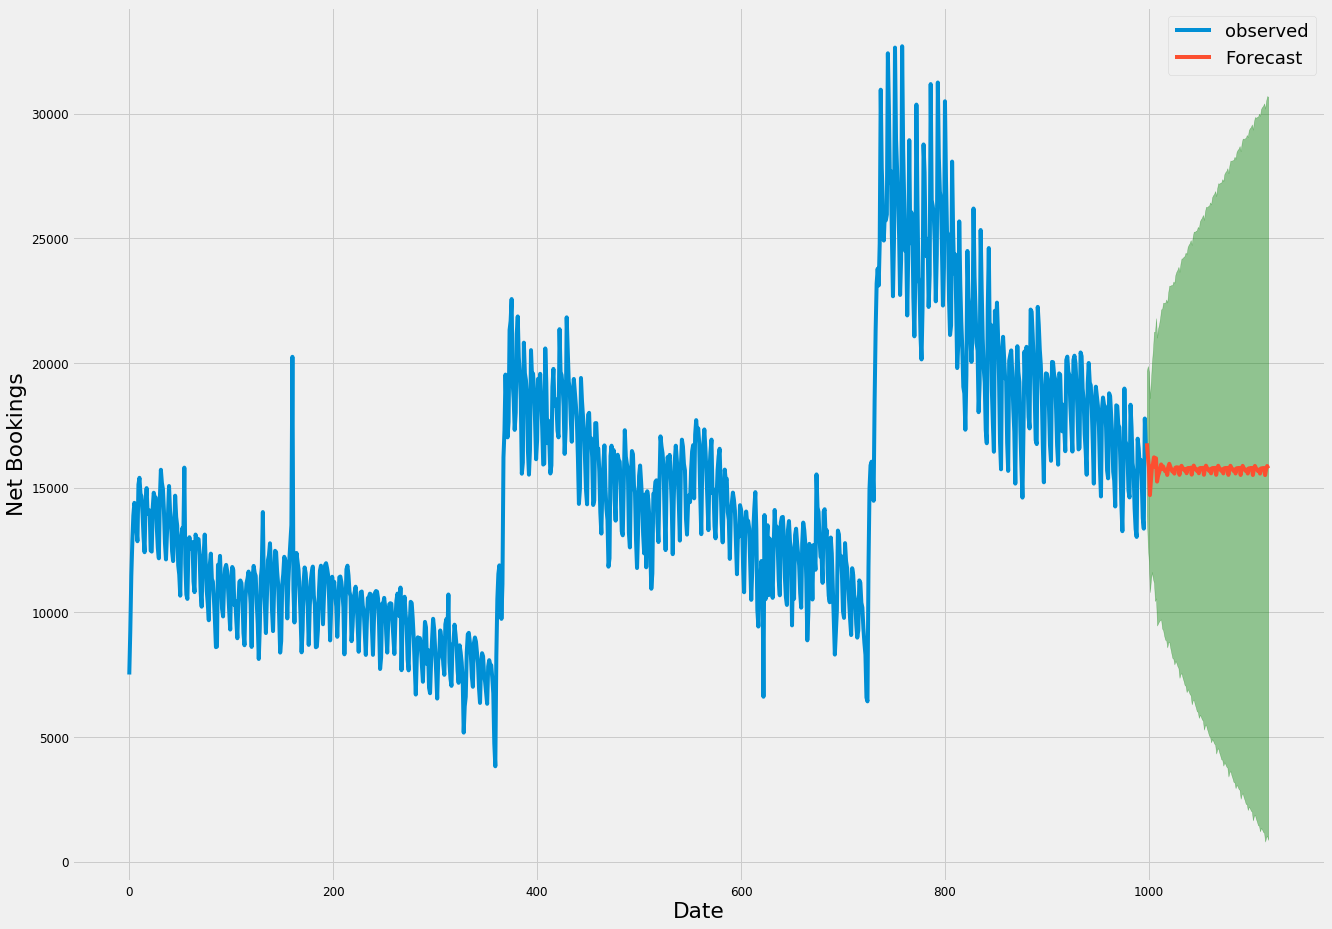

In [45]:
ax = df['nb'].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Date')
ax.set_ylabel('Net Bookings')

plt.legend()
plt.show()

In [56]:
train = df.loc[:789]   # train on 2016/01/01 to 2018/03/31
test = df.loc[790:]    # test on 2018/04/01 to 2018/09/24

In [58]:
train.tail()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
785,2018-02-24,all,all,3485779,31004,62244,25978,2442,23536,316300.7578,3280636.644,39545056
786,2018-02-25,all,all,4567724,41774,82386,33877,2685,31192,333536.9889,4062682.242,39397418
787,2018-02-26,all,all,4192501,33690,87267,30282,3750,26532,713193.0576,3636871.360,39749977
788,2018-02-27,all,all,3980640,33534,79781,30036,3727,26309,758440.5424,3780001.442,39799670
789,2018-02-28,all,all,3870725,33525,78911,29617,3649,25968,692183.6067,3544332.650,39831560


In [59]:
test.tail()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
993,2018-09-20,all,all,2618366,20243,47422,18186,2932,15254,460034.7170,2186564.295,42623939
994,2018-09-21,all,all,2436304,18075,35689,16493,2711,13782,461537.1222,1968622.521,42599173
995,2018-09-22,all,all,2265476,17870,35958,15350,1992,13358,208337.5423,1865859.361,41871425
996,2018-09-23,all,all,2949348,23921,46374,19729,1953,17776,224895.7346,2352526.189,42595267
997,2018-09-24,all,all,2864870,22350,48980,19479,2812,16667,572093.4164,2304008.981,43029450


In [61]:
mod.fit(train['nb'])

future_forecast = mod.predict(n_periods=208)     # 2018/04/01 to 2018/09/24 (n=208)
print(future_forecast)

future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

KeyboardInterrupt: 

In [62]:
mod.fit(train['nb'])

In [7]:
# load dataset
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import simplejson as json
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

df = pd.read_csv("/users/akuppam/documents/Hprog/R/Prophet/rnb1015.csv")
df_SoEu = df.loc[(df['region'] == 'SoEu') & (df['marketing'] == 'Paid')]

In [21]:
# https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
# SARIMA Grid Search
# --------------------------------------

# grid search sarima hyperparameters
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import simplejson as json
import statsmodels.api as sm
 
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores
    
# create a set of sarima configs to try
def sarima_configs(seasonal=[12]):
	models = list()
	# define config lists
	p_params = [0, 1, 2, 3, 4, 5]
	d_params = [0, 1, 2, 3, 4, 5]
	q_params = [0, 1, 2, 3, 4, 5]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2, 3, 4, 5]
	D_params = [0, 1, 2, 3, 4, 5]
	Q_params = [0, 1, 2, 3, 4, 5]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
#									model_params = [p,d,q,P,D,Q]
#									print("best sarima =", model_params)
									models.append(cfg)
	return models

if __name__ == '__main__':
	# define dataset
#	data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
	df_SoEu['nb'].tolist()
	data = df_SoEu['nb'].tolist()
#	print(data)
	# data split
	n_test = 4
	# model configs
	cfg_list = sarima_configs()
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:1]:
		print(cfg, error)
import re
model_params = [int(s) for s in re.findall(r'\b\d+\b', cfg)]
p = model_params[0]
d = model_params[1]
q = model_params[2]
P = model_params[3]
D = model_params[4]
Q = model_params[5]

model = sm.tsa.statespace.SARIMAX(df_SoEu['nb'], 
                                order=(p,d,q), 
                                seasonal_order=(P,D,Q,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary())

 > Model[[(0, 0, 0), (0, 0, 0, 12), 'n']] 101.083
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'c']] 44.038
 > Model[[(0, 0, 0), (0, 3, 0, 12), 'n']] 146.471
 > Model[[(0, 0, 0), (3, 0, 0, 12), 'n']] 26.705
 > Model[[(0, 0, 0), (0, 3, 0, 12), 'c']] 147.062
 > Model[[(0, 0, 0), (0, 0, 3, 12), 'n']] 28.879
 > Model[[(0, 0, 0), (0, 0, 3, 12), 'c']] 25.168
 > Model[[(0, 0, 0), (3, 0, 0, 12), 'c']] 26.045
 > Model[[(0, 0, 0), (3, 0, 3, 12), 'n']] 27.479
 > Model[[(0, 0, 0), (0, 0, 0, 12), 't']] 21.600
 > Model[[(0, 0, 0), (3, 3, 0, 12), 'n']] 68.286
 > Model[[(0, 0, 0), (0, 3, 0, 12), 't']] 147.935
 > Model[[(0, 0, 0), (0, 0, 3, 12), 't']] 29.904
 > Model[[(0, 0, 0), (3, 0, 3, 12), 'c']] 25.883
 > Model[[(0, 0, 0), (3, 0, 0, 12), 't']] 24.245
 > Model[[(0, 0, 0), (3, 3, 0, 12), 'c']] 69.340
 > Model[[(0, 0, 0), (0, 0, 0, 12), 'ct']] 30.011
 > Model[[(0, 0, 0), (3, 0, 3, 12), 't']] 24.703
 > Model[[(0, 0, 0), (0, 3, 0, 12), 'ct']] 148.202
 > Model[[(0, 0, 0), (0, 0, 3, 12), 'ct']] 24.111
 > Model[[(0

 > Model[[(3, 0, 0), (3, 3, 0, 12), 'ct']] 55.525
 > Model[[(3, 0, 3), (3, 0, 0, 12), 'c']] 28.133
 > Model[[(3, 0, 3), (3, 0, 3, 12), 'c']] 29.265
 > Model[[(3, 0, 3), (0, 0, 0, 12), 't']] 31.214
 > Model[[(3, 0, 3), (0, 0, 3, 12), 't']] 34.252
 > Model[[(3, 0, 0), (3, 3, 3, 12), 'ct']] 34.494
 > Model[[(3, 0, 3), (0, 3, 3, 12), 'n']] 19.998
 > Model[[(3, 0, 3), (0, 3, 0, 12), 't']] 130.883
 > Model[[(3, 0, 3), (3, 0, 0, 12), 't']] 36.803
 > Model[[(3, 0, 3), (3, 0, 3, 12), 't']] 31.803
 > Model[[(3, 0, 3), (3, 3, 0, 12), 'n']] 58.889
 > Model[[(3, 0, 3), (0, 0, 0, 12), 'ct']] 29.059
 > Model[[(3, 0, 3), (3, 3, 3, 12), 'n']] 38.567
 > Model[[(3, 0, 3), (0, 3, 3, 12), 'c']] 27.673
 > Model[[(3, 0, 3), (0, 0, 3, 12), 'ct']] 29.212
 > Model[[(3, 0, 3), (0, 3, 0, 12), 'ct']] 127.369
 > Model[[(3, 0, 3), (3, 0, 3, 12), 'ct']] 28.025
 > Model[[(3, 0, 3), (3, 0, 0, 12), 'ct']] 29.634
 > Model[[(3, 0, 3), (0, 3, 3, 12), 't']] 60.161
 > Model[[(3, 3, 0), (0, 0, 0, 12), 'n']] 64.243
 > Model[[(

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                 nb   No. Observations:                 1019
Model:             SARIMAX(3, 0, 3)x(0, 3, 3, 12)   Log Likelihood               -4210.601
Date:                            Fri, 02 Nov 2018   AIC                           8441.202
Time:                                    11:21:23   BIC                           8489.693
Sample:                                         0   HQIC                          8459.684
                                           - 1019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1521      0.591     -0.257      0.797      -1.311       1.006
ar.L2          0.8115      0.120   

In [9]:
# Forecasts 5

model = sm.tsa.statespace.SARIMAX(df_SoEu['nb'],
                                  trend='t',
                                  order=(2,1,2),
                                  seasonal_order=(2,1,2,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

h = 442
forecast = results.forecast(h)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                 nb   No. Observations:                 1019
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -4103.001
Date:                            Tue, 06 Nov 2018   AIC                           8226.002
Time:                                    10:45:42   BIC                           8274.868
Sample:                                         0   HQIC                          8244.594
                                           - 1019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       3.137e-05   5.98e-05      0.525      0.600   -8.58e-05       0.000
ar.L1         -0.4607      0.221   

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:523: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:523: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


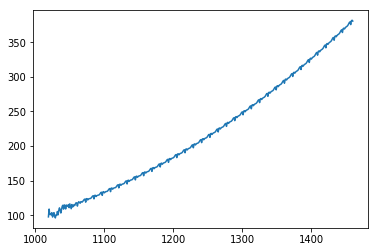

In [10]:
h = 442
forecast = results.forecast(h)
plt.plot(forecast)

In [12]:
# Forecasts 1 (stepwise_model = model, and this is coming from pyramid-auto's auto.arima)
#future_forecast = stepwise_model.predict(n_periods=442)
future_forecast1 = model.predict(n_periods=442)

TypeError: predict() missing 1 required positional argument: 'params'

In [13]:
# Forecasts 2 (mod = model from the main code above)
# mod.fit(train['nb'])
model.fit(df_SoEu['nb'])

future_forecast2 = model.predict(n_periods=442)     # 2018/10/16 to 2019/12/31 (n=442)
#print(future_forecast2)

#future_forecast2 = pd.DataFrame(future_forecast2,index = test.index,columns=['Prediction']
#pd.concat([test,future_forecast],axis=1).plot()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


TypeError: predict() missing 1 required positional argument: 'params'

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:523: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


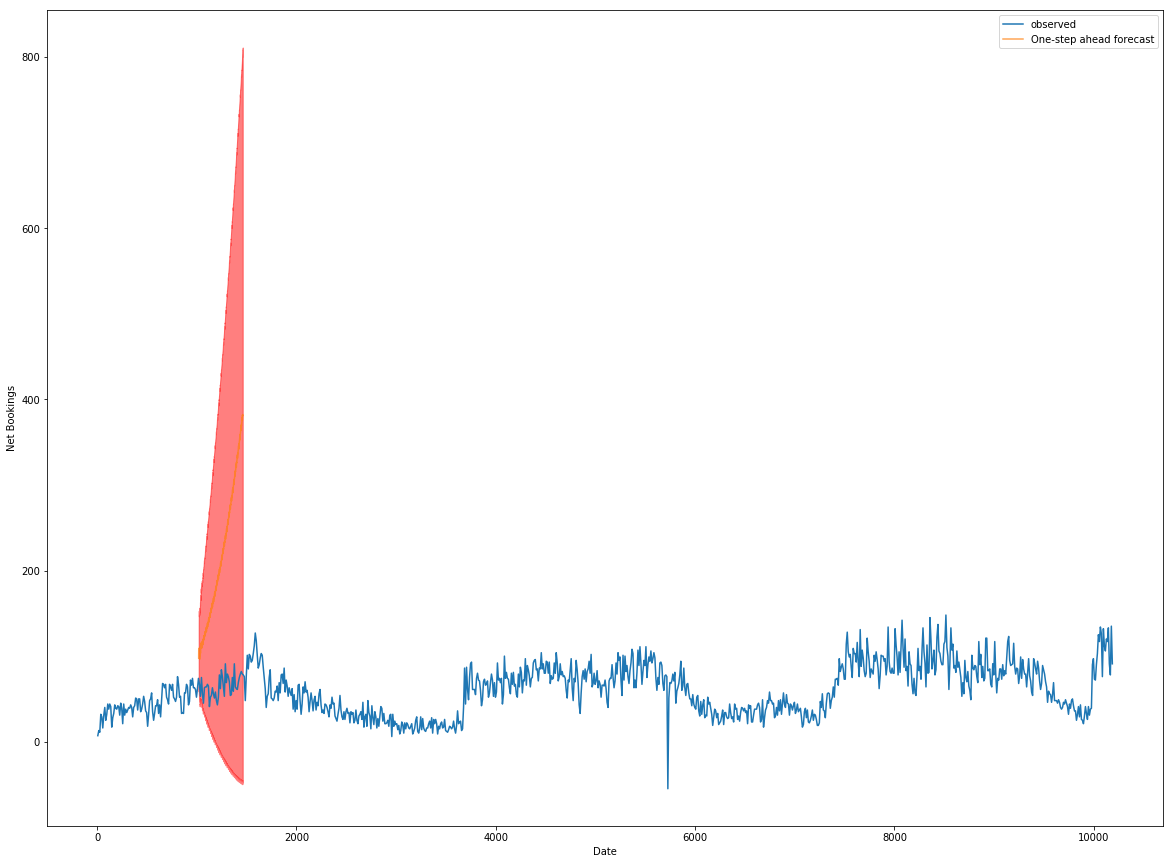

In [15]:
# Forecasts 3 (results = model.fit() from the main code above)
pred = results.get_prediction(start = 1019, end = 1461, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()
#pred_ci.to_csv("pred_ci.csv")
#pred.to_csv("pred.csv")

ax = df_SoEu['nb'].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Date')
ax.set_ylabel('Net Bookings')
plt.legend()

plt.show()

In [16]:
pred.head()

AttributeError: 'PredictionResults' object has no attribute 'head'

The Mean Squared Error (MSE) of the forecast is 4800062.84
The Root Mean Square Error (RMSE) of the forecast: nan


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:523: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


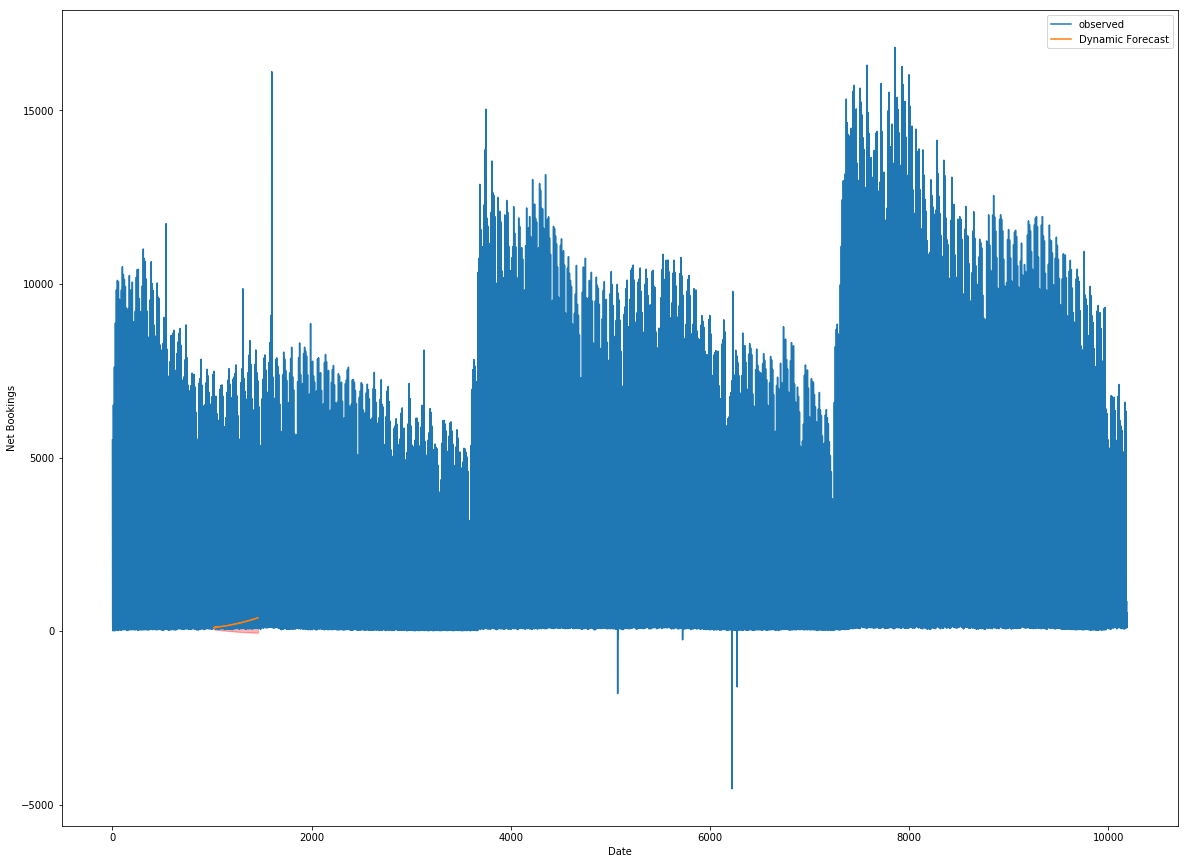

In [17]:
# Forecasts 4
import numpy as np
nb_forecast = pred.predicted_mean  # this only has the forecasted 120 time points
nb_truth = df['nb']  # this is the observed data 998 time points

# Compute the mean square error
mse = ((nb_forecast - nb_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forecast: {:.4f}'
      .format(np.sqrt(sum((nb_forecast-nb_truth)**2)/len(nb_forecast))))

nb_pred_concat = pd.concat([nb_truth, nb_forecast])
# ------------------------------------------------------------------------------------

pred_dynamic = results.get_prediction(start = 1019, end = 1461, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci
pred_dynamic_ci.to_csv("pred_dynamic_ci.csv")

ax = df['nb'].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('Net Bookings')

plt.legend()
plt.show()

In [7]:
cfg

"[(2, 1, 1), (0, 0, 0, 12), 'n']"

In [8]:
error

7.105427357601002e-15

In [9]:
scores[:1]

[("[(2, 1, 1), (0, 0, 0, 12), 'n']", 7.105427357601002e-15)]

In [11]:
# list top 3 configs
for cfg, error in scores[:1]:
	print(cfg, error)

[(2, 1, 1), (0, 0, 0, 12), 'n'] 7.105427357601002e-15


In [13]:
import re
[int(s) for s in re.findall(r'\b\d+\b', 'he33llo 42 I\'m a 32 string 30')]

[42, 32, 30]

In [108]:
with open('model_params.json','w') as out_params:
	json.dump(model_params, out_params)

with open('model_params.json') as json_file:
    out_params = json.load(json_file)
out_params
p = out_params[0]
d = out_params[1]
q = out_params[2]

NameError: name 'model_params' is not defined

In [ ]:
# saving p,d,q,P,D,Q
	model_params = [p,d,q,P,D,Q]
	print("best order =", model_params)
	with open('model_params.json','w') as out_params:
		json.dump(model_params, out_params)

with open('model_params.json') as json_file:
    out_params = json.load(json_file)
out_params
p = out_params[0]
d = out_params[1]
q = out_params[2]
 



In [51]:
p

1

In [52]:
d

0

In [53]:
q

0

In [55]:
out_params

[1, 0, 0]